In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autokeras as ak
import os 
import tensorflow as tf

In [2]:
data = np.load('/work/n1000000_0804_all_flat.npz')
cut_index = np.load('/work/NIO_largerthan500_index.npy')

In [3]:
input_state = 2

target = data['delta']
if input_state == 0:
    data_all = data['ve_dune']
elif input_state == 1:
    data_all = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune']])
elif input_state == 2:
    data_all = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune'], data['ve_t2hk'], data['vu_t2hk'], data['vebar_t2hk'], data['vubar_t2hk']])

x_train = data_all[:10000, cut_index]
y_train = target[:10000]/360
x_train2 = data_all[10000:900000, cut_index]
y_train2 = target[10000:900000]/360
x_test = data_all[900000:, cut_index]
y_test = target[900000:]/360

In [4]:
clf = ak.StructuredDataRegressor(overwrite=True, max_trials=50)
clf.fit(x_train, y_train,
           validation_split = 0.1,
           batch_size=64,
           epochs=20,
           verbose=1,
           shuffle = True
       )

Trial 50 Complete [00h 00m 19s]
val_loss: 0.018834086135029793

Best val_loss So Far: 0.0165118221193552
Total elapsed time: 00h 16m 45s
INFO:tensorflow:Oracle triggered exit

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/20
157/157 [==============================] - 1s 6ms/step - loss: 0.1540 - mean_squared_error: 0.1540
Epoch 2/20
157/157 [==============================] - 1s 6ms/step - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 3/20
157/157 [==============================] - 1s 6ms/step - loss: 0.0344 - mean_squared_error: 0.0344
Epo

In [5]:
model = clf.export_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 35)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 35)                0         
_________________________________________________________________
normalization (Normalization (None, 35)                71        
_________________________________________________________________
dense (Dense)                (None, 256)               9216      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)              

In [6]:
model.fit(x_train2, y_train2,
           validation_split = 0.1,
           batch_size=64,
           epochs=20,
           verbose=1,
           shuffle = True
         )

Epoch 1/20
12516/12516 [==============================] - 66s 5ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 2/20
12516/12516 [==============================] - 66s 5ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 3/20
12516/12516 [==============================] - 66s 5ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 4/20
12516/12516 [==============================] - 65s 5ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 5/20
12516/12516 [==============================] - 65s 5ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 6/20
12516/12516 [==============================] - 65s 5ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0136 - val_mean_squared_error: 0.013

In [7]:
model.evaluate(x_test, y_test)
pre_test = model.predict(x_test)

3125/3125 [==============================] - 10s 3ms/step - loss: 0.0135 - mean_squared_error: 0.0135


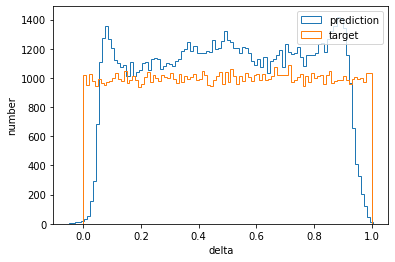

In [8]:
plt.hist(pre_test, histtype = 'step', bins = 100, label = 'prediction')
plt.hist(y_test, histtype = 'step', bins = 100, label = 'target')
plt.xlabel('delta')
plt.ylabel('number')
plt.legend()
plt.show()

Text(0.5, 1.0, 'delta')

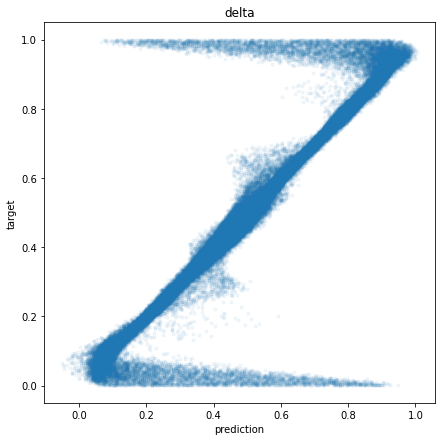

In [9]:
plt.figure(figsize=(7,7))
plt.plot(pre_test, y_test, '.', alpha = 0.05)
plt.xlabel('prediction')
plt.ylabel('target')
plt.title('delta')

In [10]:
modelname = '/work/ML4NO/ML/Regression/cuts/0804_cut500_delta1.h5'
if not os.path.isfile(modelname):
    model.save(modelname)